# Linear Regression

In [1]:
from myst_nb import glue
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


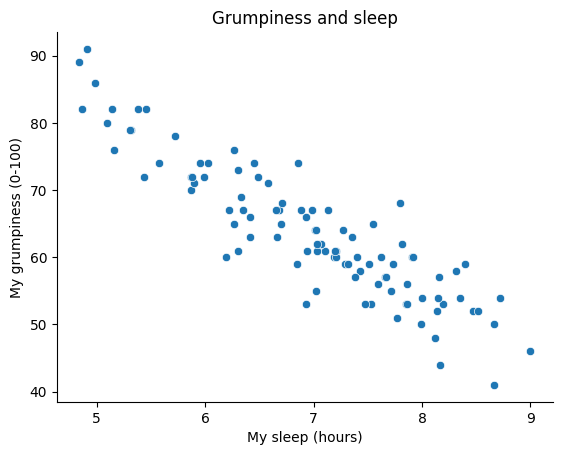

In [3]:
fig = plt.figure()

ax = sns.scatterplot(data=df,
                     x='dan_sleep',
                     y='dan_grump')
ax.set(title='Grumpiness and sleep',
       ylabel='My grumpiness (0-100)', xlabel='My sleep (hours)')
sns.despine()

# plt.close()

# glue("sleepycorrelation-fig", fig, display=False)

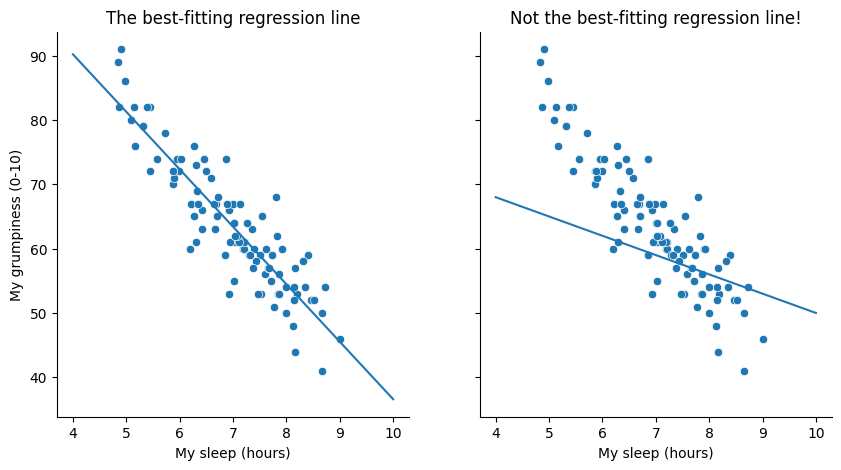

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# find the regression coefficients to allow manually plotting the line
model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep


fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

x = np.linspace(4, 10)


sns.scatterplot(data=df, x='dan_sleep', y='dan_grump', ax=axes[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")
fig.axes[0].plot(x, slope*x+intercept)

sns.scatterplot(data=df, x='dan_sleep', y='dan_grump', ax=axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(x, -3*x+80)

sns.despine()

# plt.close()

# glue("sleep_regressions_1-fig", fig, display=False)

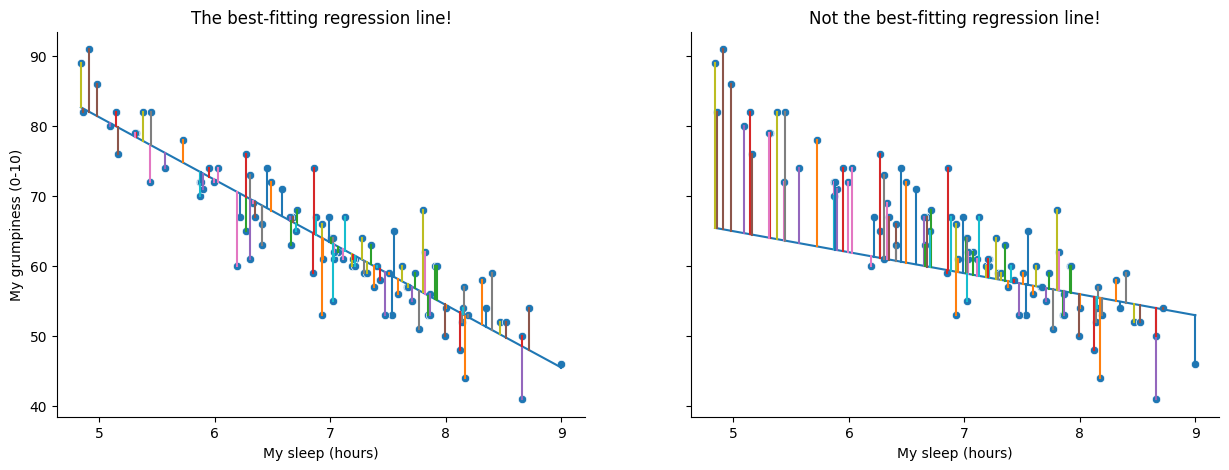

In [5]:
import numpy
import scipy
import matplotlib
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


xData = df['dan_sleep']

yData = numpy.array(df['dan_grump'])


# (the solution to this figure stolen shamelessly from this stack-overflow answer by James Phillips:

# https://stackoverflow.com/questions/53779773/python-linear-regression-best-fit-line-with-residuals)


# fit linear regression model and save parameters


def func(x, a, b):

    return a * x + b


initialParameters = numpy.array([1.0, 1.0])


fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)


modelPredictions = func(xData, *fittedParameters)


data = pd.DataFrame({'x': xData,

                     'y': yData})


# plot data points

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.scatterplot(data=data, x='x', y='y', ax=axes[0])

fig.axes[0].set_title("The best-fitting regression line!")

fig.axes[0].set_xlabel("My sleep (hours)")

fig.axes[0].set_ylabel("My grumpiness (0-10)")


# add regression line

xModel = numpy.linspace(min(xData), max(xData))

yModel = func(xModel, *fittedParameters)


axes[0].plot(xModel, yModel)


# add drop lines

for i in range(len(xData)):

    lineXdata = (xData[i], xData[i])  # same X

    lineYdata = (yData[i], modelPredictions[i])  # different Y

    axes[0].plot(lineXdata, lineYdata)


#####


# create poor-fitting model

badParameters = np.array([-3, 80])

badPredictions = func(xData, *badParameters)


bad_xModel = numpy.linspace(min(xData), max(xData))

bad_yModel = func(bad_xModel, *badParameters)


# plot data with poor-fitting model

sns.scatterplot(data=data, x='x', y='y', ax=axes[1])

fig.axes[1].set_title("Not the best-fitting regression line!")

fig.axes[1].set_xlabel("My sleep (hours)")

fig.axes[1].set_ylabel("My grumpiness (0-10)")

fig.axes[1].plot(bad_xModel, bad_yModel)


# add drop lines

for i in range(len(xData)):

    lineXdata = (xData[i], xData[i])

    lineYdata = (yData[i], badPredictions[i])

    axes[1].plot(lineXdata, lineYdata)


sns.despine()


# plt.close()

# glue("sleep_regressions_2-fig", fig, display=False)

In [6]:
import pingouin as pg

mod1 = pg.linear_regression(df['dan_sleep'], df['dan_grump'])

In [7]:
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


$[ \text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) ]$

$[ \text{Var}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 ]$

In [8]:
df_wine = pd.read_csv("./data_sets/wine.csv")
wine = df_wine.round(2)

In [14]:
Y = df_wine["Price"]
X = df_wine.loc[:, ['WinterRain', 'AGST', 'HarvestRain', 'Age']]

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
result = smf.ols(
    formula="Price ~ WinterRain + AGST + HarvestRain + Age", data=df_wine).fit()

result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.796   
Dependent Variable: Price            AIC:                13.5921 
Date:               2024-03-10 12:02 BIC:                20.0713 
No. Observations:   27               Log-Likelihood:     -1.7961 
Df Model:           4                F-statistic:        26.39   
Df Residuals:       22               Prob (F-statistic): 4.06e-08
R-squared:          0.828            Scale:              0.082082
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -3.6516    1.6881  -2.1631  0.0417  -7.1524  -0.1507
WinterRain     0.0012    0.0005   2.4204  0.0242   0.0002   0.0022
AGST           0.6164    0.0952   6.4764  0.0000   0.4190   0.8138
HarvestRain   -0.0039    0.0008  -4.7808  0.0001  -0.0055  -0.0022
Age            0.0238    0.0072   3.3276  0.0031   0.0090   0.0387
-----------------------------------------------------------------
Omnibus:              1.970        Durbin-Watson:           2.787
Prob(Omnibus):        0.373        Jarque-Bera (JB):        1.102
Skew:                 0.038        Prob(JB):                0.576
Kurtosis:             2.013        Condition No.:           19539
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [30]:
# Get Standard Error
np.sqrt(result.scale)

0.2864990406147946

In [31]:
result.bse

Intercept      1.688088
WinterRain     0.000482
AGST           0.095175
HarvestRain    0.000808
Age            0.007167
dtype: float64